## Support Vector Machines
SVM is a supervised machine learnig technique that have primarily been used for classification tasks.

![SVM](./images/svm1.png)

#### Overview:
In SVM we try to maximize the width of the decision boundry. This reduces the degrees of freedom of the separator and reduces overfitting.
- Training SVM require optimizing conves cost function
- They use the idea of **kernel substitution** and hence are sometimes called **kernel methods**

#### Formulation:
1. If c(in triangle) and d(in circle) are the closest points in the 2 convex hulls then $w=d-c$.

Objective Function:

$$min_a \; \frac{1}{2}norm2(c-d)$$
Constraints:

$$c = \Sigma_{class1} a_ix_i$$
$$d = \Sigma_{class2} a_ix_i$$
$$\Sigma_{class1} a_i=1$$
$$\Sigma_{class2} a_i=1$$
$$a_i >= 0$$

2. Dual form: If we consider this is minimizing margin

Objective Function:

$$min_a \; \frac{1}{2}norm2(w)$$
Constraints:

$$w.x_i >= b+1; class1$$
$$w.x_i <= b11; class2$$

This can be written in dual form as:

Objective Function:

$$min_a \; \frac{1}{2} \Sigma_i \Sigma_j y_i y_j a_i a_j x_i.x_j - \Sigma_i a_i$$

Constraint:
$$\Sigma_i y_i a_i = 0$$
$$ a_i>=0$$


In all these case, $w = \Sigma_i y_i a_i x_i$ and $b$ is determined by support vector
#### Benefits:

#### Shortfalls:

**Reference**:
1. Image taken from this paper - https://hal.archives-ouvertes.fr/hal-00564987/document

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [3]:
df = pd.read_csv("datasets/lr_data.csv")
df = df.drop(columns="Unnamed: 0")
# df_train = df.iloc[0:1500]
# df_test = df.iloc[1500:]
df_train, df_test = split_train_test(df, 0.2)

X_train = df_train[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_train = df_train["is_booked"]
X_test = df_test[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_test = df_test["is_booked"]

print(df.shape)
print(df_train.shape)
print(df_test.shape)
df.head()

(1890, 6)
(1512, 6)
(378, 6)


,is_booked,tmv,demand_supply_ratio,price,category_grouped,month
0,0,14569,1.902318,30.0,1,5
1,1,4201,14.622831,39.0,0,5
2,1,5724,8.659708,24.0,1,4
3,1,39102,13.570390,121.0,2,12
4,0,9666,1.297453,42.0,1,8


In [4]:
# ?svm.LinearSVC

Understanding parameters of LinearSVM <br>
C : This is the <xxxx> term. Smaller C means wider margin but more misclassifications.

In [5]:
model = svm.LinearSVC(C=1.464)
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[ 0.00013105  0.034502   -0.00346217  0.00012276  0.00711784]]
[0.00158428]


In [6]:
# print(model.predict(X_test))
print(model.score(X_test, y_test))

0.5158730158730159


In [7]:
metrics.confusion_matrix(model.predict(X_test), y_test)

array([[  0,   0],
       [183, 195]])

- This is almost like a random guess and I suspect it's because the features in unscaled. Applying scaling might help.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
svm_clf = Pipeline([("scaler", StandardScaler()), 
                   ("linear_svc", svm.LinearSVC(C=1, loss="hinge"))])
svm_clf.fit(X_train, y_train)

# print(svm_clf.predict(X_test))
print(svm_clf.score(X_test, y_test))

0.6984126984126984


In [10]:
metrics.confusion_matrix(svm_clf.predict(X_test), y_test)

array([[118,  49],
       [ 65, 146]])

### Polynomial Kernel

In [11]:
model = svm.SVC()
model.fit(X_train, y_train)
# print(model.coef_)
# print(model.intercept_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
# print(model.predict(X_test))
print(model.score(X_test, y_test))

0.843915343915344


### ROC

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, model.predict(X_train))

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

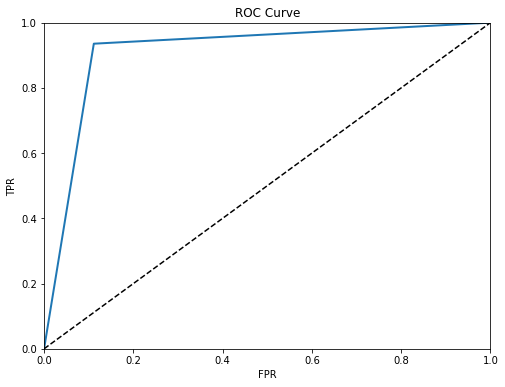

In [17]:
plot_roc_curve(fpr, tpr)